## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
bos = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(bos.data, bos.target, test_size = 0.3, random_state = 7)

clf = DecisionTreeRegressor(
#     criterion = 'gini',
    max_depth = 8,
    min_samples_split = 2,
    min_samples_leaf = 1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mean_squared_error(y_test, y_pred)

19.494127649022335

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
bos = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(bos.data, bos.target, test_size = 0.3, random_state = 7)

clf = DecisionTreeRegressor(
#     criterion = 'gini',
    max_depth = 4,
    min_samples_split = 20,
    min_samples_leaf = 1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mean_squared_error(y_test, y_pred)

18.496855261190287

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
<p></p>
A. 限制決策樹的最大深度，以及拆分的資料數量，可以避免Overfitting，讓模型預測Testing set有更好的表現(模型的泛化程度較高)。
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較
<p></p>
A. 本次練習使用Boston房價資料集，因為target為連續型資料，所以使用DecisionTreeRegressor，並以MSE來衡量模型表現。

#### 延伸閱讀-練習畫圖

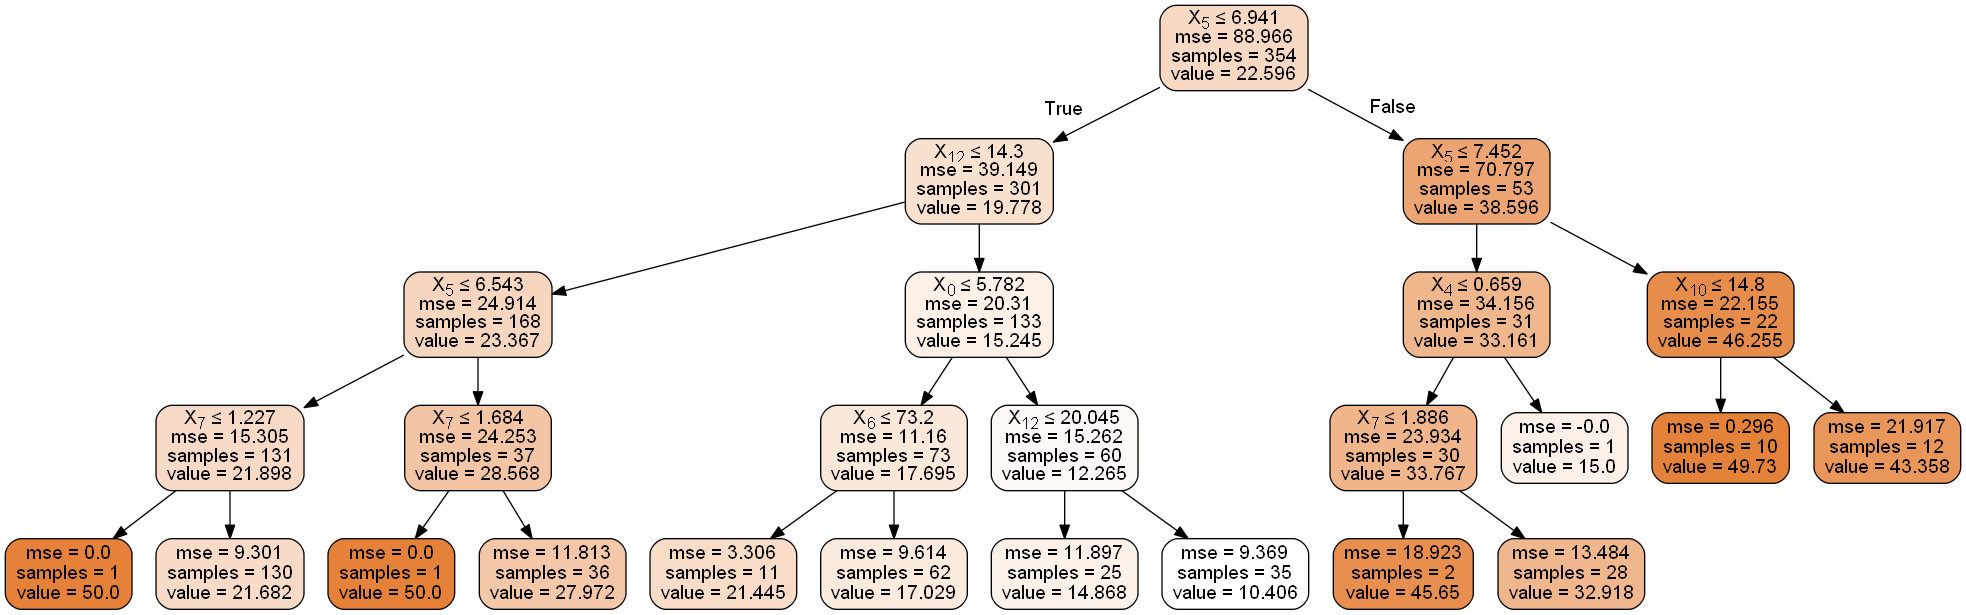

In [8]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    clf, out_file=dot_data,
    filled=True, rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width = 3000, height=2600)